In [163]:
import numpy as np
import pandas as pd

# đọc dữ liệu
df = pd.read_csv('kaggle_diabetes.csv')


In [164]:
# trả về số hàng, số cột
df.shape

(2000, 9)

In [165]:
# trả về kiểu dữ liệu của từng cột
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [166]:
# đọc dữ liệu
df.head()
# Out come: 0 là k bị tiểu đường, 1 là bị

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [167]:
# trả về số liệu thống kê của từng cột
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [168]:
# rà soát xem có cột nào có dữ liệu null hay không
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [170]:
# xây dựng biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

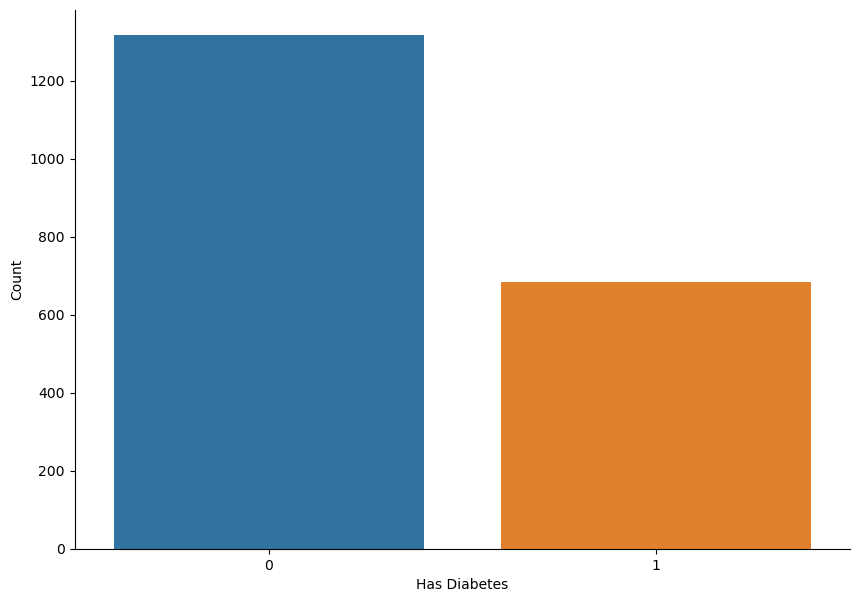

In [171]:
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

In [172]:
# loại bỏ các giá trị 0 trong bảng, thay bằng Nan (thư viện Pandas)
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [173]:
# thay thế giá trị NaN bằng giá trị trung bình, trung vị dựa trên phân bố
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

In [174]:
# Kiểm tra lại còn giá trị Null nào trong bảng không
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [175]:
#Xây dựng model

# chia bộ dữ liệu thành 2 phần, train và test
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


In [176]:
# Chuẩn hóa dữ liệu - 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [226]:
# Tạo hàm tìm ra model tốt nhất cho bài toán
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
#                 siêu tham só, C thấp sẽ làm mô hình nhiều tham số, nhưng sẽ dẫn đến overfitting, C cao chú trọng đến dữ liệu 
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
#                 độ sâu tối đa của cây
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200] 
#                 số cây trong random forest
            }
        },
        'knn': {
            'model': KNeighborsClassifier(),
            'parameters': {
                'n_neighbors': [3, 5, 7],
#                 số điểm gần kề
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 10},0.763125
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 10}",0.900000
2,random_forest,{'n_estimators': 200},0.950625
3,knn,{'n_neighbors': 3},0.828750


In [179]:
# Mô hình RandomForest và mô hình knn có độ chính xác cao nhất
# Tính độ chính xác của mô hình Radom Forest
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 95%


In [196]:
# Tạo mô hình
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [181]:
# Tạo confusion matrix cho bộ dữ liệu test
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred)
cm_test

array([[272,   0],
       [  5, 123]], dtype=int64)

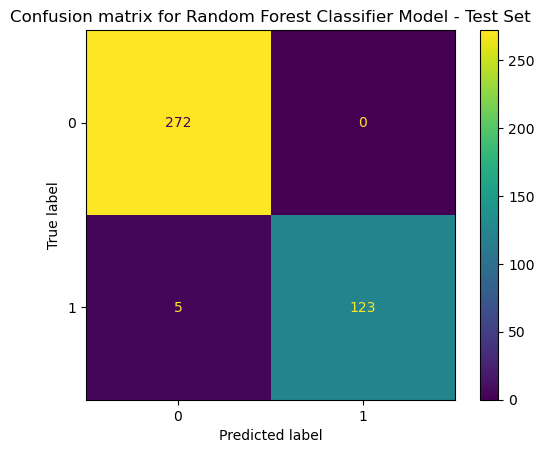

In [182]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.show()

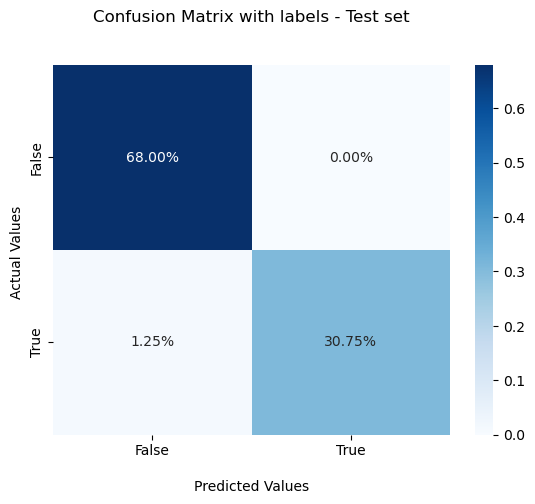

In [183]:
ax = sns.heatmap(cm_test/np.sum(cm_test), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels - Test set\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [131]:
# Điểm Accuracy cho bộ test
test_score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(test_score))

Accuracy on test set: 98.75%


In [184]:
# tạo confusion matrix cho bộ dữ liệu huấn luyện
y_train_pred = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

array([[1044,    0],
       [   1,  555]], dtype=int64)

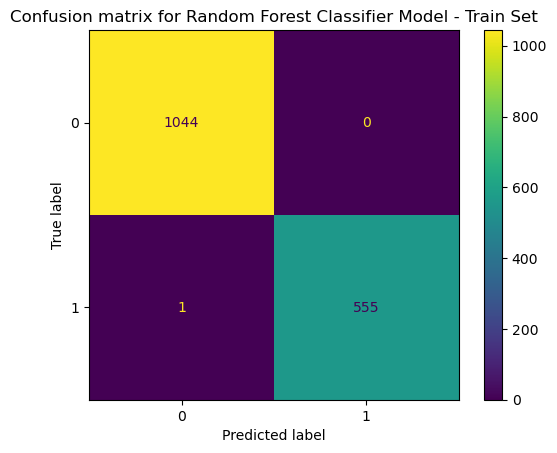

In [133]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.show()

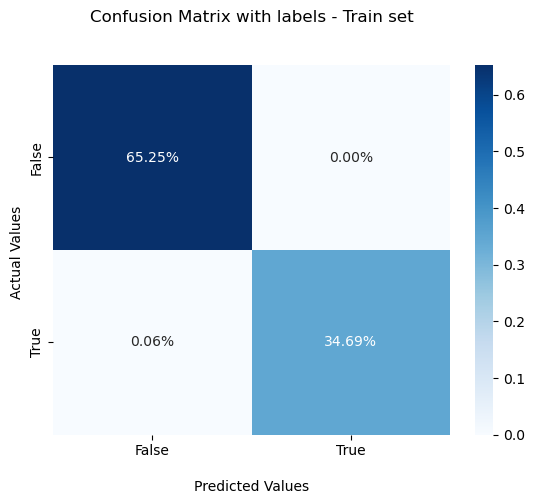

In [134]:
ax = sns.heatmap(cm_train/np.sum(cm_train), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels - Train set\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [135]:
# Điểm Accuracy cho bộ train
train_score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on test set: {}%".format(train_score))

Accuracy on test set: 99.94%


In [192]:
# Dự đoán
# Tạo hàm dự đoán
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return classifier.predict(x)

In [197]:
# Tạo các trường hợp dự đoán
# Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(4, 125, 70, 18, 122, 28.9, 1.44, 45)
print(prediction)
if prediction:
  print('Bạn đã bị tiểu đường')
else:
  print("Bạn không bị tiểu đường")

[1]
Bạn đã bị tiểu đường


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [189]:
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
if prediction:
  print('Bạn đã bị tiểu đường')
else:
  print("Bạn không bị tiểu đường")

Bạn đã bị tiểu đường


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [157]:
prediction = predict_diabetes(2, 190, 92, 17, 81, 26.1, 0.551, 23)
if prediction:
  print('Bạn đã bị tiểu đường')
else:
  print("Bạn không bị tiểu đường")

Bạn không bị tiểu đường


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [160]:
prediction = predict_diabetes(1, 17, 88, 24, 145, 34.5, 0.403, 40)
if prediction:
  print('Bạn đã bị tiểu đường')
else:
  print("Bạn không bị tiểu đường")

Bạn đã bị tiểu đường


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [198]:
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Bạn đã bị tiểu đường')
else:
  print("Bạn không bị tiểu đường")

Bạn không bị tiểu đường


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<Axes: xlabel='BMI', ylabel='Outcome'>

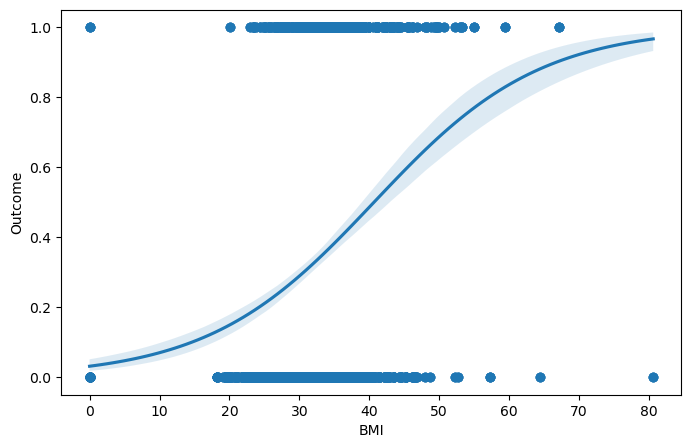

In [202]:
# Sơ đồ hồi quy logistic 1 biến số biểu thị mối quan hệ giữa chỉ số BMI và khả năng tiểu đường

bmi_to_out = df[['BMI','Outcome']]

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
plt.scatter(bmi_to_out['BMI'], bmi_to_out['Outcome'])
sns.regplot(data = df, x = df['BMI'], y = df['Outcome'], logistic = True)

<Axes: xlabel='Age', ylabel='Outcome'>

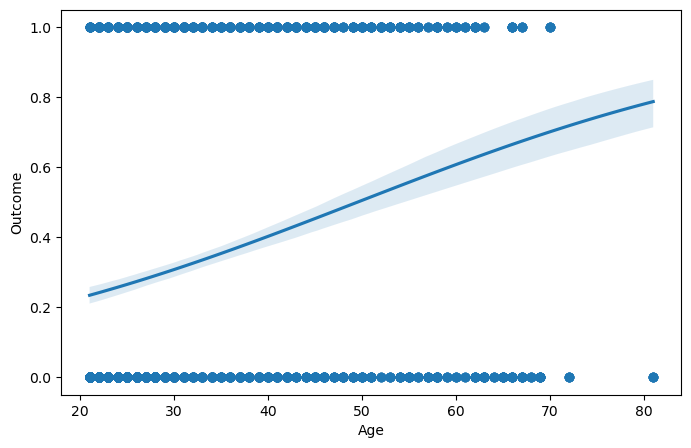

In [203]:
# Sơ đồ hồi quy logistic 1 biến số biểu thị mối quan hệ giữa tuổi tác và khả năng tiểu đường

age_to_out = df[['Age','Outcome']]
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
plt.scatter(age_to_out['Age'], age_to_out['Outcome'])
sns.regplot(data = df, x = df['Age'], y = df['Outcome'], logistic = True)

<Axes: xlabel='Glucose', ylabel='Outcome'>

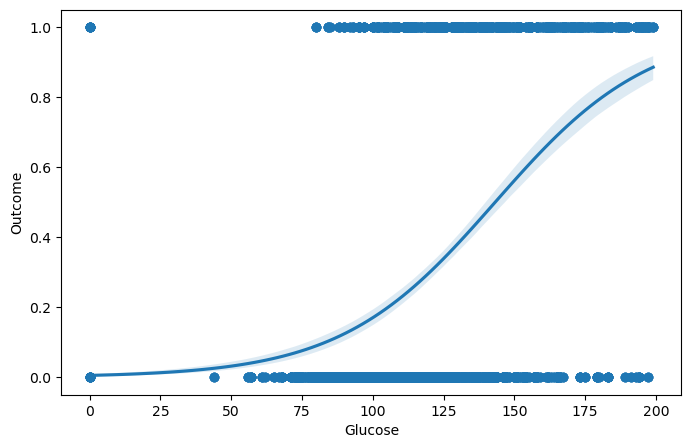

In [206]:
# Sơ đồ hồi quy logistic 1 biến số biểu thị mối quan hệ giữa Glucose và khả năng tiểu đường

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
plt.scatter(df['Glucose'], df['Outcome'])
sns.regplot(data = df, x = df['Glucose'], y = df['Outcome'], logistic = True)

In [233]:
# cây kNN
results = []
recallresults = []
for k in range (1, 100, 2):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train,y_train)
    prediction1 = knn_classifier.predict(X_test)
    tp = sum(prediction1[y_test == 1] == 1)
    fn = sum(prediction1[y_test == 1] == 0)
    accuracy = sum(prediction1 == y_test)/len(y_test)
    recall =  tp / (tp + fn)
    print("k:",k,"Accuracy:",accuracy, "// Recall: ", recall)
    results.append([k,accuracy])
    recallresults.append([k,recall])

k: 1 Accuracy: 0.98 // Recall:  0.953125
k: 3 Accuracy: 0.88 // Recall:  0.7421875
k: 5 Accuracy: 0.7875 // Recall:  0.6015625
k: 7 Accuracy: 0.8175 // Recall:  0.640625
k: 9 Accuracy: 0.8 // Recall:  0.609375
k: 11 Accuracy: 0.7825 // Recall:  0.5703125
k: 13 Accuracy: 0.7875 // Recall:  0.6015625
k: 15 Accuracy: 0.7725 // Recall:  0.546875
k: 17 Accuracy: 0.7625 // Recall:  0.5234375
k: 19 Accuracy: 0.755 // Recall:  0.4921875
k: 21 Accuracy: 0.75 // Recall:  0.4609375
k: 23 Accuracy: 0.745 // Recall:  0.4765625
k: 25 Accuracy: 0.745 // Recall:  0.4765625
k: 27 Accuracy: 0.735 // Recall:  0.46875
k: 29 Accuracy: 0.75 // Recall:  0.5
k: 31 Accuracy: 0.7575 // Recall:  0.515625
k: 33 Accuracy: 0.76 // Recall:  0.5234375
k: 35 Accuracy: 0.77 // Recall:  0.5390625
k: 37 Accuracy: 0.77 // Recall:  0.5390625
k: 39 Accuracy: 0.7675 // Recall:  0.5234375
k: 41 Accuracy: 0.7675 // Recall:  0.53125
k: 43 Accuracy: 0.7675 // Recall:  0.5078125
k: 45 Accuracy: 0.775 // Recall:  0.5078125
k: 47 A

In [238]:
k = 3
print("k =",k)
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train,y_train)
prediction1 = knn_classifier.predict(X_test)

cm = confusion_matrix(y_test, prediction)
print(cm)

tp = sum(prediction1[y_test==1]==1)
fn = sum(prediction1[y_test==1]==0)
tn = sum(prediction1[y_test==0]==0)
fp = sum(prediction1[y_test==0]==1)
print("TN: ",tn,"  FP:",fp,"  FN:",fn,"  TP:",tp )

accuracy = (tp+tn)/len(y_test)
print("Accuracy:", accuracy)
recall = tp/(tp+fn)
print("Recall:", recall)

k = 3
[[246  26]
 [ 68  60]]
TN:  257   FP: 15   FN: 33   TP: 95
Accuracy: 0.88
Recall: 0.7421875
